In [82]:
from ValueIteration import value_iteration
import matplotlib.pyplot as plt
import math

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with no lead times

In [83]:

def create_P(demand_distribution):
    def prob_trans(s, a, sp):
        demand = s + a - sp
        return demand_distribution.get(demand, 0)

    return prob_trans

def create_R(demand_distribution, hold_cost, backlog_cost, order_cost):
    def cost_function(s, a):
        holding_cost = hold_cost*(sum(max(s + a - dt, 0)*prob for dt, prob in demand_distribution.items()))
        backlogged_cost = backlog_cost*(sum(max(dt - s - a, 0)*prob for dt, prob in demand_distribution.items()))
        ordering_cost = order_cost*a

        return holding_cost + backlogged_cost + ordering_cost
    
    return cost_function


def value_update_func(capacity):
    def bellman_eq_no_lead(s, S, A, P, R, gamma, Vk):
        values = dict((a, 0) for a in A if s+a <= capacity) # value function at s for each action
        # print(s, values.keys())
        for a in values.keys():
            values[a] = R(s, a) + gamma*sum([P(s, a, sp)*Vk[sp] for sp in S])
        # print(values)
        return values
    return bellman_eq_no_lead




In [84]:

capacity = 100
S = set(range(-capacity, capacity+1))
A = set(range(math.ceil(capacity/2)+1))
demand_dist = {0: 0.2, 10: 0.6, 20: 0.2}
ch = 10
cb = 100
cs = 30
P = create_P(demand_dist)
R = create_R(demand_dist, ch, cb, cs)
V_init = dict([(s, 0) for s in S])    # initial probability of winning at all states is 0
gamma=1
bellman_eq_no_lead = value_update_func(capacity)

results = value_iteration(S=S, A=A, P=P, R=R, gamma=gamma, max_iterations=1000, 
                          bellman_eq=bellman_eq_no_lead, V_init=V_init, theta=1e-7)    



Converged!


In [85]:
optimal_policy = results["optimal_policy"]
cost_function = results["value_function"]


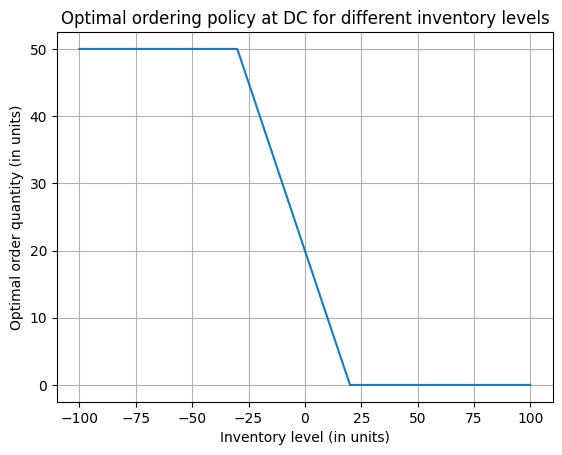

In [86]:
plt.plot(*zip(*sorted(optimal_policy.items())))
plt.title("Optimal ordering policy at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Optimal order quantity (in units)")
plt.grid()
plt.show()

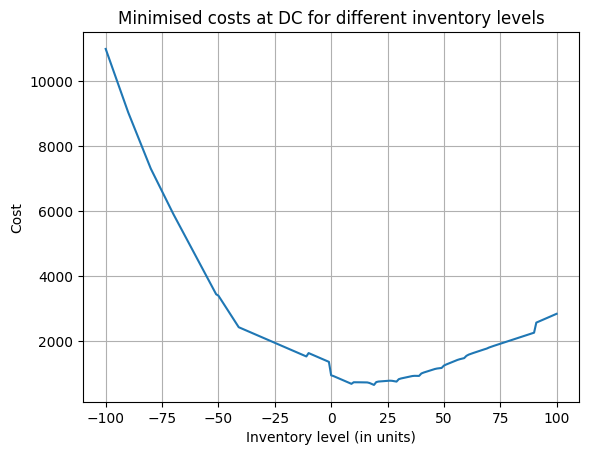

In [87]:
plt.plot(*zip(*sorted(cost_function.items())))
plt.title("Minimised costs at DC for different inventory levels")
plt.xlabel("Inventory level (in units)")
plt.ylabel("Cost")
plt.grid()
plt.show()

# Implementing Value Iteration to solve 2-echelon inventory optimisation MDP with lead times